In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('salary.csv')

In [5]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
#label encoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['rank']=LE.fit_transform(df['rank'])
df['discipline']=LE.fit_transform(df['discipline'])
df['sex']=LE.fit_transform(df['sex'])

In [8]:
df['rank'].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

In [9]:
df['discipline'].value_counts()

1    216
0    181
Name: discipline, dtype: int64

In [10]:
df['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

In [11]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [12]:
corr_sl=df.corr()

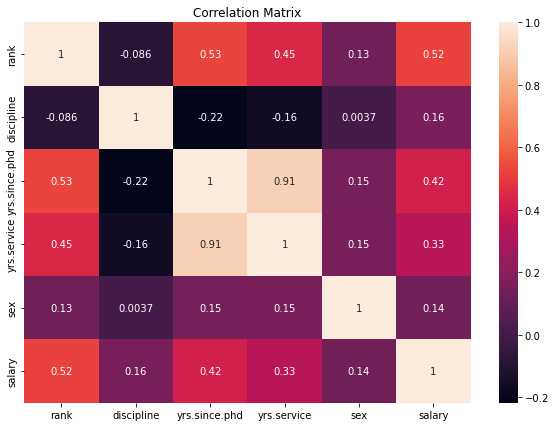

In [13]:
plt.figure(figsize=[10,7])
sns.heatmap(corr_sl,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [30]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [53]:
df=df.drop(['sex'],axis=1)  #because its contribution is very less to the target variable


In [54]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

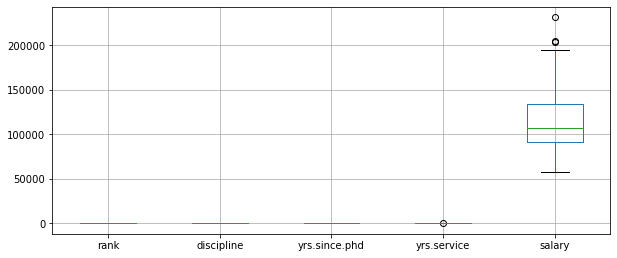

In [56]:
df.boxplot(figsize=[10,5])
plt.subplots_adjust(bottom=0.25)    

In [57]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape


(397, 5)

In [58]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [59]:
len(np.where(z>3)[0])

4

In [71]:
df.drop([43, 131, 330, 364],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [72]:
df_new=df[(z<3).all(axis=1)]
print('Old Dataframe',df.shape)
print('New dataframe',df_new.shape)


Old Dataframe (397, 5)
New dataframe (393, 5)


In [73]:
x=df_new.drop('salary',axis=1)  #splitting of data
y=df_new['salary']

In [74]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [75]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
lm=LinearRegression()

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred=lm.predict(x_test)
print('predicted salary:',pred)
print('acctual salary',y_test)

predicted salary: [ 97981.31264601 119191.60443127 124224.25612532 130381.95093698
 119765.16333507 136823.26561231 139650.2200497  119873.27808129
 132863.5120458  122096.21838423 127485.43078447  94683.02686443
 123034.36068523 127199.61122374  82152.06631986 126979.01139398
 127831.85047781  83727.67990875 119590.4565868  137687.61478042
 128705.2879166  121228.77679454 131420.52139111 128261.10330698
 115504.62062484 116632.64294655  94973.15934648  95454.28758017
 130907.87534341 133014.08541222  92857.80730253 118789.38817568
 129438.59469814 122295.37520779  90004.38179558  89335.18924485
 114708.07926477  89110.32315626 133283.06938912 118238.21347429
 135197.78221878 131650.19491981 118629.38167267  93262.79446987
 125649.65188548 129202.54655127 130929.8293502  132835.27970863
 123699.73397068  94016.55907613  88109.32584856  88542.01288746
 134640.4357611   75449.1885526  121516.19941366 122134.16464482
 133296.19908469 132616.27496443 120378.42224916  99131.28473354
  97668

In [78]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 18363.874857648632
Mean squared error : 558858478.9380903
Root Mean Squared Error: 23640.187794052956


In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.3781889717845892


In [80]:
lm.score(x_train,y_train)

0.44661301965751254

In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.24849052 0.57491121 0.41012385 0.26059421 0.31281385]
0.3613867271274097
0.12102232863596529


In [82]:
import joblib
joblib.dump(lm,'lmfile.obj')#save model as object file
lm_from_joblib=joblib.load('lmfile.obj') #load the model from the file
lm_from_joblib.predict(x_test)

array([ 97981.31264601, 119191.60443127, 124224.25612532, 130381.95093698,
       119765.16333507, 136823.26561231, 139650.2200497 , 119873.27808129,
       132863.5120458 , 122096.21838423, 127485.43078447,  94683.02686443,
       123034.36068523, 127199.61122374,  82152.06631986, 126979.01139398,
       127831.85047781,  83727.67990875, 119590.4565868 , 137687.61478042,
       128705.2879166 , 121228.77679454, 131420.52139111, 128261.10330698,
       115504.62062484, 116632.64294655,  94973.15934648,  95454.28758017,
       130907.87534341, 133014.08541222,  92857.80730253, 118789.38817568,
       129438.59469814, 122295.37520779,  90004.38179558,  89335.18924485,
       114708.07926477,  89110.32315626, 133283.06938912, 118238.21347429,
       135197.78221878, 131650.19491981, 118629.38167267,  93262.79446987,
       125649.65188548, 129202.54655127, 130929.8293502 , 132835.27970863,
       123699.73397068,  94016.55907613,  88109.32584856,  88542.01288746,
       134640.4357611 ,  